In [8]:
%matplotlib inline


In [51]:
import pandas as pd

df = pd.read_csv('dataset/wholesale.csv')
print(df.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [52]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
import os
os.environ["OMP_NUM_THREADS"] = "2"

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ...rest of your data loading and clustering code


In [53]:

## data preprocessing module
from sklearn.preprocessing import StandardScaler

# Specify the feature columns for segmentation
feature_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

def preprocess_data(df, feature_cols):
    X = df[feature_cols]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled


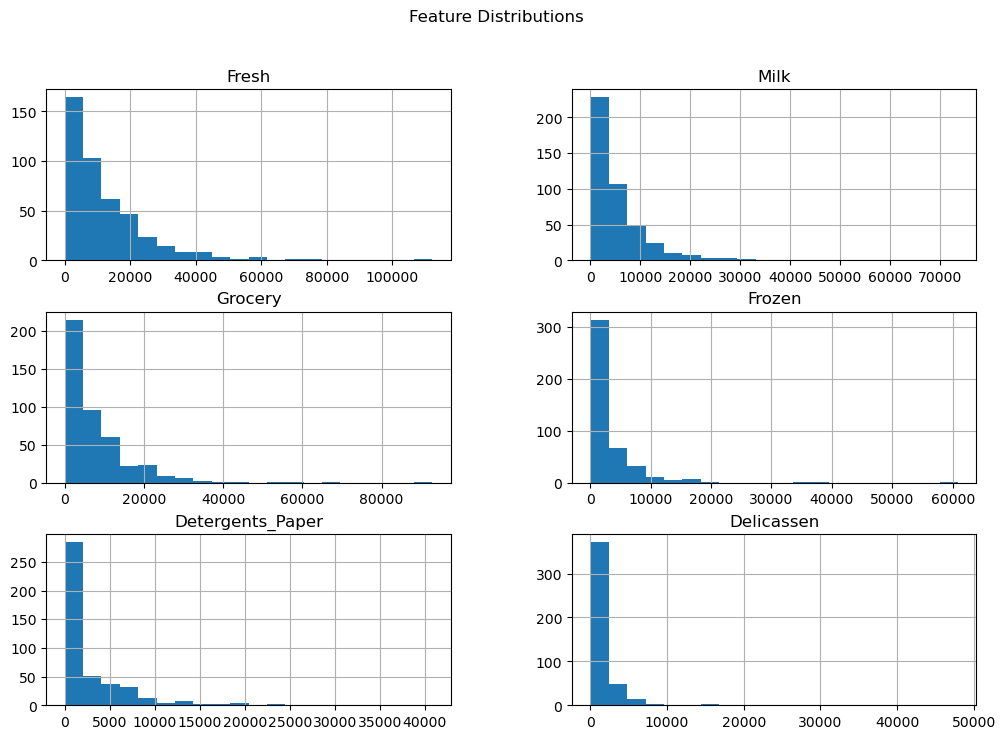

In [54]:
## EDA 
## histogram
import matplotlib.pyplot as plt
import seaborn as sns


def plot_feature_histograms(df, feature_cols):
    df[feature_cols].hist(bins=20, figsize=(12,8))
    plt.suptitle("Feature Distributions")
    plt.show()
plot_feature_histograms(df, feature_cols)


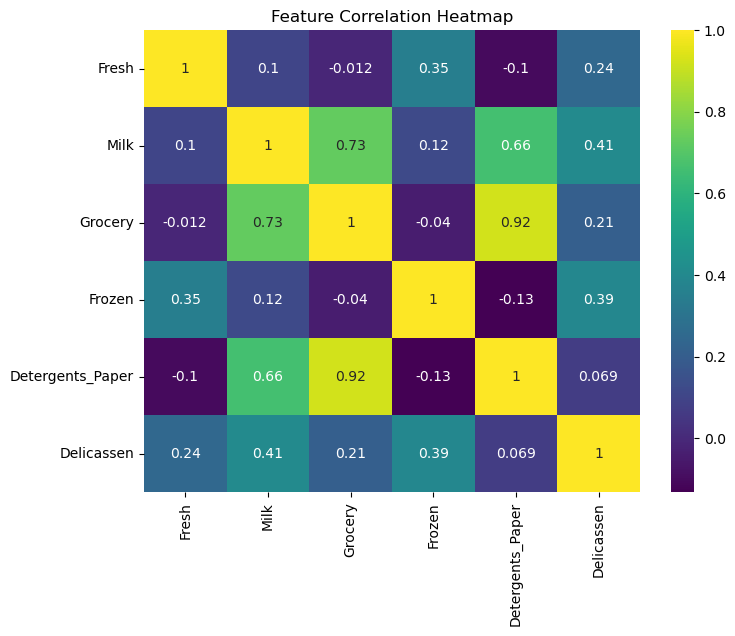

In [55]:
##corelation heatmap
def plot_correlation_heatmap(df, feature_cols):
    plt.figure(figsize=(8,6))
    sns.heatmap(df[feature_cols].corr(), annot=True, cmap='viridis')
    plt.title("Feature Correlation Heatmap")
    plt.show()
plot_correlation_heatmap(df, feature_cols)


In [56]:
from sklearn.cluster import KMeans

# Choose your number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)


c:\Users\harit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [57]:
from sklearn.preprocessing import StandardScaler

feature_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[feature_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


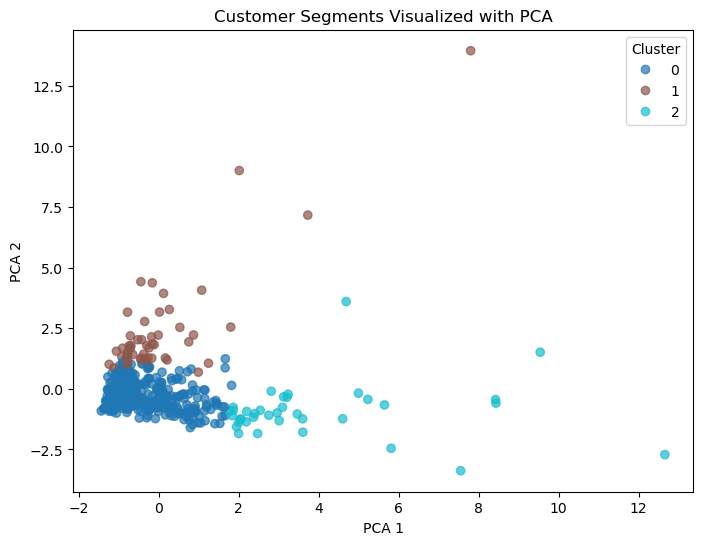

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_clusters_pca(X_scaled, labels):
    """
    Reduce dimensions with PCA for cluster visualization.
    """
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(X_scaled)
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap='tab10', alpha=0.7)
    plt.title("Customer Segments Visualized with PCA")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(*scatter.legend_elements(), title="Cluster")
    plt.show()
plot_clusters_pca(X_scaled, labels)


In [59]:

import numpy as np
def plot_cluster_counts(labels):
    """
    Bar plot of customer counts per cluster.
    """
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(6,4))
    plt.bar(unique, counts, color='skyblue')
    plt.xlabel('Cluster Label')
    plt.ylabel('Number of Customers')
    plt.title('Customers per Cluster')
    plt.show()


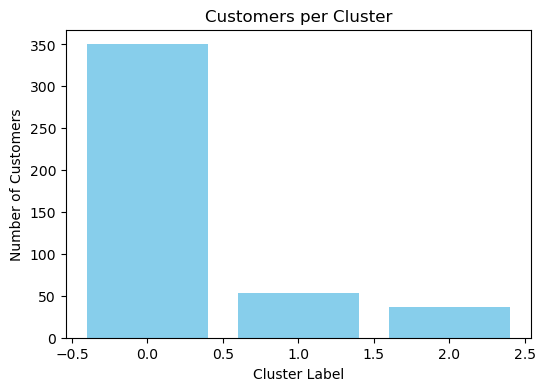

In [60]:

plot_cluster_counts(labels)

In [61]:
def cluster_feature_means(df, labels, feature_cols):
    df_clustered = df.copy()
    df_clustered['Cluster'] = labels
    cluster_means = df_clustered.groupby('Cluster')[feature_cols].mean()
    print("Average Feature Values per Cluster:\n", cluster_means)


In summary:
The notebook images help you see the structure and diversity of your customer base. Each segment represents a distinct customer type, which you can use for targeted strategies and business insight.